# 1ST PROJECT: MODEM 16-QAM

In this project, we aim to design and implement a digital modem based on Quadrature Amplitude Modulation (QAM) using the Python programming language. QAM is a widely used modulation technique in modern digital communication systems due to its high data rate capabilities and spectral efficiency.

The main goal is to develop a complete system capable of generating, transmitting, and receiving QAM symbols, while analyzing various performance aspects such as symbol energy, phase, noise effects, and bit error rate (BER).

 The project also includes the evaluation of system performance through metrics like bit error rate (BER) and signal-to-noise ratio (SNR), along with the visualization of constellation diagrams.

We chose 16-QAM because :

it's Perfect for medium-resolution images or environments where bandwidth is limited.

Compared to 64-QAM or 256-QAM, 16-QAM is less sensitive to noise and distortion.

Images often don’t need ultra-high throughput — 16-QAM offers a balanced and stable transmission for compressed pictures like JPEG or PNG.

# 1st part

In this part we generate the constellation of a 16-QAM modulator using Gray coding to ensure that adjacent symbols differ by only one bit, which minimizes the bit error rate, by maximizing the Euclidean separation between symbol points that differ by multiple bits..

It displays a correspondence table that maps binary bits to symbols (I, Q components), their energy, and phase.
Some specific bit patterns are identified as "trigger symbols" and are highlighted in the graphical display.
it also computes a global energy summary for the entire constellation.




 TABLEAU DE CORRESPONDANCE 16-QAM avec codage Gray 
SYMBOLE | BITS | DÉCIMAL |   I   |   Q   | ÉNERGIE | PHASE (°)
--------|------|---------|-------|-------|---------|-----------
      0 | 0000 |       0 |  -3.0 |   3.0 |   18.00 |    135.00
      1 | 0001 |       1 |  -1.0 |   3.0 |   10.00 |    108.43
      2 | 0011 |       3 |   1.0 |   3.0 |   10.00 |     71.57
      3 | 0010 |       2 |   3.0 |   3.0 |   18.00 |     45.00
      4 | 0100 |       4 |  -3.0 |   1.0 |   10.00 |    161.57
      5 | 0101 |       5 |  -1.0 |   1.0 |    2.00 |    135.00
      6 | 0111 |       7 |   1.0 |   1.0 |    2.00 |     45.00
      7 | 0110 |       6 |   3.0 |   1.0 |   10.00 |     18.43
      8 | 1100 |      12 |  -3.0 |  -1.0 |   10.00 |   -161.57
      9 | 1101 |      13 |  -1.0 |  -1.0 |    2.00 |   -135.00
     10 | 1111 |      15 |   1.0 |  -1.0 |    2.00 |    -45.00
     11 | 1110 |      14 |   3.0 |  -1.0 |   10.00 |    -18.43
     12 | 1000 |       8 |  -3.0 |  -3.0 |   18.00 |   -135.00
 

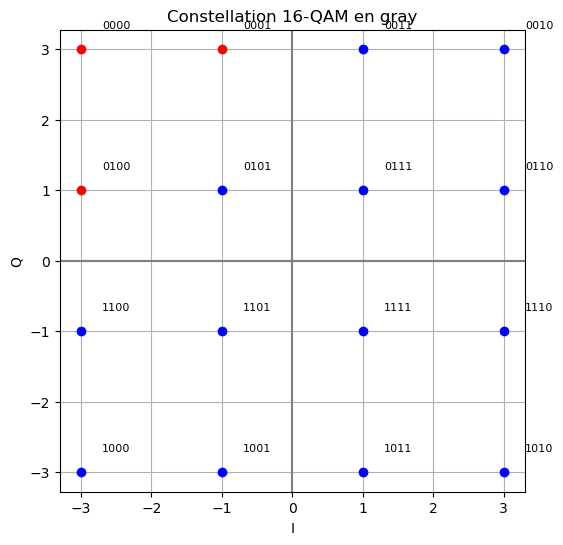


 BILAN GLOBAL :
Énergie totale consommée par le système : 47.93

 Niveaux d'énergie distincts (3) : [2, 10, 18]
 Nombre de phases distinctes : 12
 Nombre total de phases (avec doublons) : 16
 Phases de déclenchement (en degrés) : [135.0, 108.43, 161.57]

 DÉTAILS DES SYMBOLES PAR NIVEAU D'ÉNERGIE :

 energy = 2 :
    → Coordonnées (I, Q) = (-1, 1)
    → Coordonnées (I, Q) = (1, 1)
    → Coordonnées (I, Q) = (-1, -1)
    → Coordonnées (I, Q) = (1, -1)

 energy = 10 :
    → Coordonnées (I, Q) = (-1, 3)
    → Coordonnées (I, Q) = (1, 3)
    → Coordonnées (I, Q) = (-3, 1)
    → Coordonnées (I, Q) = (3, 1)
    → Coordonnées (I, Q) = (-3, -1)
    → Coordonnées (I, Q) = (3, -1)
    → Coordonnées (I, Q) = (-1, -3)
    → Coordonnées (I, Q) = (1, -3)

 energy = 18 :
    → Coordonnées (I, Q) = (-3, 3)
    → Coordonnées (I, Q) = (3, 3)
    → Coordonnées (I, Q) = (-3, -3)
    → Coordonnées (I, Q) = (3, -3)


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# option code gray 
def gray_code(n):
    if n == 0:
        return ['']
    prev = gray_code(n - 1)
    return ['0' + b for b in prev] + ['1' + b for b in reversed(prev)]
    
# M symbols  
def generate_16qam_gray_2d():
    M = 16
    bits_per_symbol = 4
    iq_levels = [-3, -1, 1, 3]
    gray_2bit = gray_code(2)
    bit_table = []
    
# tablau de correspondance
    print("\n TABLEAU DE CORRESPONDANCE 16-QAM avec codage Gray ")
    print("SYMBOLE | BITS | DÉCIMAL |   I   |   Q   | ÉNERGIE | PHASE (°)")
    print("--------|------|---------|-------|-------|---------|-----------")

    index = 0
    for q_idx, q in enumerate(reversed(iq_levels)):
        for i_idx, i in enumerate(iq_levels):
            i_bits = gray_2bit[i_idx]
            q_bits = gray_2bit[q_idx]
            bits = q_bits + i_bits
            decimal = int(bits, 2)
            energy = i ** 2 + q ** 2
            phase = np.degrees(np.arctan2(q, i))
            bit_table.append((index, bits, decimal, i, q, energy, phase))
            print(f"{index:7} | {bits} | {decimal:7} | {i:5.1f} | {q:5.1f} | {energy:7.2f} | {phase:9.2f}")
            index += 1

# declancheurs & dephaseurs
    trigger_bits = {'0000', '0001', '0100'} 
    dephaseur = 90  

    print("\n  PHASES DE DÉCLENCHEMENT IDENTIFIÉES :")
    for row in bit_table:
        if row[1] in trigger_bits:
            print(f"  → Symbole bits = {row[1]}, phase = {round(row[6], 2)}°")

    print(f"\n  Déphaseur standard utilisé : {dephaseur}°")

# constellation tx 
    plt.figure(figsize=(6, 6))
    for row in bit_table:
        i, q = row[3], row[4]
        color = 'red' if row[1] in trigger_bits else 'blue'
        plt.plot(i, q, 'o', color=color)
        plt.text(i + 0.3, q + 0.3, row[1], fontsize=8)
    plt.grid(True)
    plt.axhline(0, color='gray')
    plt.axvline(0, color='gray')
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Constellation 16-QAM en gray")
    plt.axis("equal")
    plt.show()

    # Bilan d'énergie
    energies = [row[5] for row in bit_table]
    phases = [round(row[6], 2) for row in bit_table]
    unique_energies = sorted(set(energies))
    unique_phases = sorted(set(phases))

    total_energy = 0
    energy_groups = {}

    for row in bit_table:
        energy = row[5]
        coords = (row[3], row[4])
        if energy not in energy_groups:
            energy_groups[energy] = []
        energy_groups[energy].append(coords)
    
    for energy, coords in energy_groups.items():
        total_energy += np.sqrt(energy) * len(coords)
        
# affichage  
    print("\n BILAN GLOBAL :")
    print(f"Énergie totale consommée par le système : {total_energy:.2f}")
    print(f"\n Niveaux d'énergie distincts ({len(unique_energies)}) : {unique_energies}")
    print(f" Nombre de phases distinctes : {len(unique_phases)}")
    print(f" Nombre total de phases (avec doublons) : {len(phases)}")
    print(f" Phases de déclenchement (en degrés) : {[round(row[6], 2) for row in bit_table if row[1] in trigger_bits]}")

    print("\n DÉTAILS DES SYMBOLES PAR NIVEAU D'ÉNERGIE :")
    for energy_level in sorted(energy_groups.keys()):
        print(f"\n energy = {energy_level} :")
        for coord in energy_groups[energy_level]:
            print(f"    → Coordonnées (I, Q) = {coord}")


generate_16qam_gray_2d()


# 2nd part


This code simulates the transmission of symbols over a 16-QAM modulation system using Gray coding to maximize 
bit separation and reduce errors. It introduces noise and phase distortion to a small portion of the transmitted 
symbols to mimic real-world communication conditions.

At the end of the simulation, the code displays the received constellation diagram, along with the estimated 
Bit Error Rate (BER) and Signal-to-Noise Ratio (SNR), giving insight into the quality of the transmission.


### 3rd part

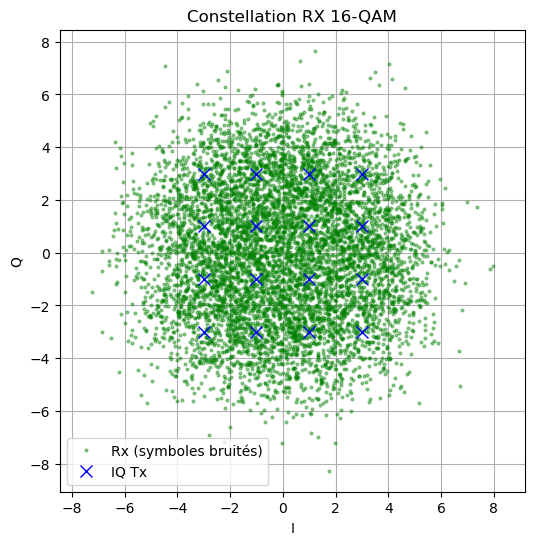


Simulation avec bruit :
  → BER estimé : 0.234929
  → SNR estimé : 2.65 dB


In [88]:
import numpy as np
import matplotlib.pyplot as plt

# option code gray 
def gray_code(n):
    if n == 0:
        return ['']
    prev = gray_code(n - 1)
    return ['0' + b for b in prev] + ['1' + b for b in reversed(prev)]


def generate_16qam_constellation():
    iq_levels = [-3, -1, 1, 3]
    gray_2bit = gray_code(2)
    constellation = {}
    for q_idx, q in enumerate(reversed(iq_levels)):
        for i_idx, i in enumerate(iq_levels):
            bits = gray_2bit[q_idx] + gray_2bit[i_idx]
            symbol = i + 1j * q
            constellation[bits] = symbol
    return constellation

def demap_symbol(symbol, constellation):
    return min(constellation.items(), key=lambda kv: abs(symbol - kv[1]))[0]

def transmit_receive(constellation, EbN0_dB=5, N=5000, bruit_phase_std=0.5):
    bit_list = list(constellation.keys())
    symbol_list = list(constellation.values())

    tx_bits = np.random.choice(bit_list, size=N)
    tx_symbols = np.array([constellation[b] for b in tx_bits])

    rx_symbols = tx_symbols.copy()

    # Bruit de phase
    phase_noise = np.random.normal(0, bruit_phase_std, N)
    rx_symbols *= np.exp(1j * phase_noise)

    # Bruit AWGN
    EbN0 = 10**(EbN0_dB / 10)
    Es = np.mean(np.abs(tx_symbols)**2)
    N0 = Es / EbN0
    noise = np.sqrt(N0 / 2) * (np.random.randn(N) + 1j * np.random.randn(N))
    rx_symbols += noise

    rx_bits = [demap_symbol(s, constellation) for s in rx_symbols]

    total_bits = N * 4
    bit_errors = sum(b1 != b2 for b1, b2 in zip(''.join(tx_bits), ''.join(rx_bits)))
    ber = bit_errors / total_bits

    noise_power = np.mean(np.abs(rx_symbols - tx_symbols)**2)
    snr_estime = 10 * np.log10(Es / noise_power) if noise_power > 0 else np.inf

    return tx_symbols, rx_symbols, ber, snr_estime

def plot_constellation(tx, rx, constellation):
    plt.figure(figsize=(6, 6))
    plt.plot(rx.real, rx.imag, 'go', label='Rx (symboles bruités)', markersize=2, alpha=0.4)
    plt.plot([s.real for s in constellation.values()],
             [s.imag for s in constellation.values()],
             'bx', label='IQ Tx', markersize=8)
    plt.grid(True)
    plt.axis('equal')
    plt.xlabel("I")
    plt.ylabel("Q")
    plt.title("Constellation RX 16-QAM")
    plt.legend()
    plt.show()

# Simulation
constellation = generate_16qam_constellation()
tx, rx, ber, snr = transmit_receive(constellation, EbN0_dB=5, N=7000, bruit_phase_std=0.5)
plot_constellation(tx, rx, constellation)

print(f"\nSimulation avec bruit :")
print(f"  → BER estimé : {ber:.6f}")
print(f"  → SNR estimé : {snr:.2f} dB")


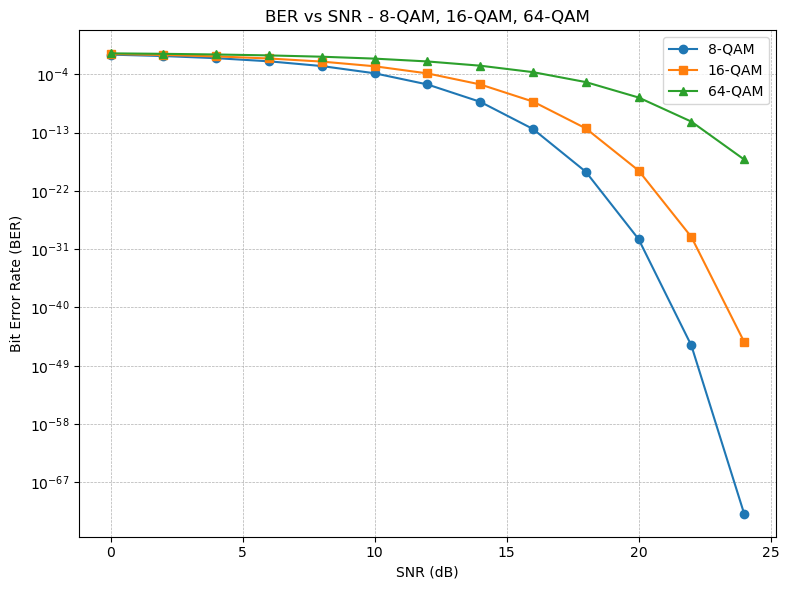

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erfc

# Fonction générique de BER pour M-QAM
def ber_theorique_mqam(EbN0_dB, M):
    EbN0 = 10**(EbN0_dB / 10)
    k = np.log2(M)
    return (2 * (1 - 1 / np.sqrt(M)) / k) * erfc(np.sqrt((3 * k * EbN0) / (2 * (M - 1))))

# jusqu'à 24 dB
def plot_ber_vs_snr():
    snr_range = range(0, 25, 2) 

    ber_8qam = [ber_theorique_mqam(snr, 8) for snr in snr_range]
    ber_16qam = [ber_theorique_mqam(snr, 16) for snr in snr_range]
    ber_64qam = [ber_theorique_mqam(snr, 64) for snr in snr_range]
    
# Affichage 
    plt.figure(figsize=(8, 6))
    plt.semilogy(snr_range, ber_8qam, '-o', label='8-QAM')
    plt.semilogy(snr_range, ber_16qam, '-s', label='16-QAM')
    plt.semilogy(snr_range, ber_64qam, '-^', label='64-QAM')

    plt.xlabel("SNR (dB)")
    plt.ylabel("Bit Error Rate (BER)")
    plt.title("BER vs SNR - 8-QAM, 16-QAM, 64-QAM")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_ber_vs_snr()


# 4th part

This code applies the 16-QAM modem to transmit a grayscale image over a noisy channel. It first encodes the image into a bitstream, modulates it using 16-QAM symbols, and simulates transmission through a channel with added phase noise and AWGN. The received symbols are then demodulated back into bits, and the reconstructed image is compared to the original. This process demonstrates the impact of noise on image transmission in a communication system

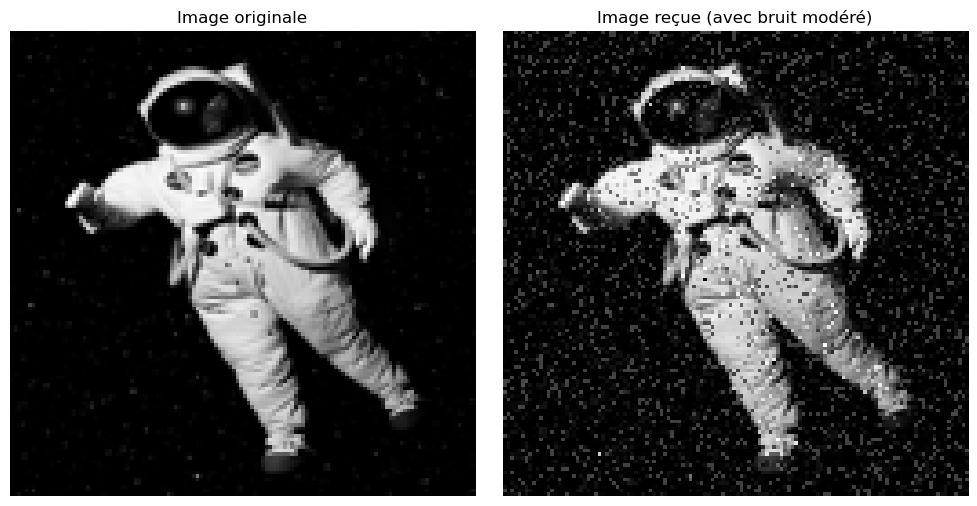

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def gray_code(n):
    if n == 0:
        return ['']
    prev = gray_code(n - 1)
    return ['0' + b for b in prev] + ['1' + b for b in reversed(prev)]

def generate_16qam_constellation():
    iq_levels = [-3, -1, 1, 3]
    gray_2bit = gray_code(2)
    constellation = {}
    for q_idx, q in enumerate(reversed(iq_levels)):
        for i_idx, i in enumerate(iq_levels):
            bits = gray_2bit[q_idx] + gray_2bit[i_idx]
            symbol = i + 1j * q
            constellation[bits] = symbol
    return constellation

def demap_symbol(symbol, constellation):
    return min(constellation.items(), key=lambda kv: abs(symbol - kv[1]))[0]

def image_to_bits(img):
    img_flat = np.array(img).flatten()
    bits = [format(pixel, '08b') for pixel in img_flat]
    return list(''.join(bits))

def bits_to_image(bits, shape):
    pixels = [int(''.join(bits[i:i+8]), 2) for i in range(0, len(bits), 8)]
    img_array = np.array(pixels, dtype=np.uint8).reshape(shape)
    return Image.fromarray(img_array)

def transmit_receive_image(bits, constellation, EbN0_dB=15, bruit_phase_std=0.2):
    N = len(bits) // 4
    bit_groups = [''.join(bits[i:i+4]) for i in range(0, len(bits), 4)]
    tx_symbols = np.array([constellation[b] for b in bit_groups])

    rx_symbols = tx_symbols.copy()

    # Bruit de phase 
    phase_noise = np.random.normal(0, bruit_phase_std, N)
    rx_symbols *= np.exp(1j * phase_noise)

    # Bruit AWGN
    EbN0 = 10**(EbN0_dB / 10)
    Es = np.mean(np.abs(tx_symbols)**2)
    N0 = Es / EbN0
    noise = np.sqrt(N0 / 2) * (np.random.randn(N) + 1j * np.random.randn(N))
    rx_symbols += noise

    rx_bits = [demap_symbol(s, constellation) for s in rx_symbols]
    bitstream = ''.join(rx_bits)
    return list(bitstream)

def show_images(original, received):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("Image originale")
    axes[0].axis('off')

    axes[1].imshow(received, cmap='gray')
    axes[1].set_title("Image reçue (avec bruit modéré)")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()


constellation = generate_16qam_constellation()


img = Image.open("imagee.webp").convert('L').resize((128, 128))
bits = image_to_bits(img)


rx_bits = transmit_receive_image(bits, constellation, EbN0_dB=15, bruit_phase_std=0.2)
rx_bits = rx_bits[:len(bits)] 


img_recue = bits_to_image(rx_bits, img.size)

# Affichage
show_images(img, img_recue)
